In [3]:
import sys
!{sys.executable} -m pip install tweepy
!{sys.executable} -m pip install textblob
import config as config

import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
  
class TwitterClient(object):
    def __init__(self):
        consumer_key = 'tVCaXcKOFQXLsbQsIdjArMNgK'
        consumer_secret = '95H5Fg1FIK8xqooszwTJI6ZtAWfZj7jtJtiDSPz8B6gheONVh7'
        access_token = '187000666-KeNn9ZI9RKauYYEVpzQX40om3mBFmuKMuJi2GFlN'
        access_token_secret = 's3wn6GuJfklsYFVoPyFoYCuseQV9ZNif14HaeIakXYfVH'
        
        try: 
            # crear el objeto OAuthHandler 
            self.auth = OAuthHandler(consumer_key, consumer_secret) 
            # set access token and secret 
            self.auth.set_access_token(access_token, access_token_secret) 
            # crear un objeto API de tweepy para obtener tweets 
            self.api = tweepy.API(self.auth) 
        except: 
            print("Error: Authentication Failed")
            
    def clean_tweet(self, tweet): 
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 
          
        
    def get_tweet_sentiment(self, tweet): 
        # crear el objeto TextBlob del texto tweet pasado 
        analysis = TextBlob(self.clean_tweet(tweet)) 
        # establecer el sentimiento... 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'
    
    def get_tweets(self, query, count = 10): 
        ''' 
        Main function to fetch tweets and parse them. 
        '''
        # lista vacía para almacenar tweets analizados 
        tweets = [] 
  
        try: 
            # llamar a twitter api para obtener tweets 
            fetched_tweets = self.api.search(q = query, count = count) 
  
            # analizando los tweets uno por uno 
            for tweet in fetched_tweets: 
                # diccionario vacío para almacenar los parámetros necesarios de un tweet 
                parsed_tweet = {} 
  
                # guardando el texto del tweet 
                parsed_tweet['text'] = tweet.text 
                # guardando el sentimiento del tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 
  
                # añadir el tweet parsed a la lista de tweets 
                if tweet.retweet_count > 0: 
                    # si el tweet tiene retweets, asegúrate de que se añada sólo una vez 
                    if parsed_tweet not in tweets: 
                        tweets.append(parsed_tweet) 
                else: 
                    tweets.append(parsed_tweet) 
  
            # devuelva los tweets analizados 
            return tweets 
  
        except tweepy.TweepError as e: 
            # error de impresión (si lo hay) 
            print("Error : " + str(e))
     
        # creando el objeto de la clase TwitterClient 
api = TwitterClient() 
        # función de llamada para obtener tweets 
tweets = api.get_tweets(query = 'Reguetón', count = 200) 
  
        # elegir los tweets positivos de los tweets 
ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
        # porcentaje de tweets positivos 
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 
        # recogiendo tweets negativos de los tweets 
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']

neutraltweets = [tweet for tweet in tweets if not tweet['sentiment'] == 'positive' and not tweet['sentiment']== 'negative' ]
    # porcentaje de tweets negativos 
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 
    # porcentaje de tweets neutros
print("Neutral tweets percentage: {} %".format(100*len(neutraltweets)/len(tweets)))
  
        # imprimiendo los primeros 5 tweets positivos 
print("\n\nPositive tweets:") 
for tweet in ptweets[0:10]: 
    print(tweet['text']) 
  
print("\n\nNegative tweets:") 
for tweet in ntweets[0:10]: 
            print(tweet['text'])

tensorboard 2.0.2 has requirement setuptools>=41.0.0, but you'll have setuptools 39.0.1 which is incompatible.
google-auth 1.10.0 has requirement setuptools>=40.3.0, but you'll have setuptools 39.0.1 which is incompatible.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


tensorboard 2.0.2 has requirement setuptools>=41.0.0, but you'll have setuptools 39.0.1 which is incompatible.
google-auth 1.10.0 has requirement setuptools>=40.3.0, but you'll have setuptools 39.0.1 which is incompatible.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Positive tweets percentage: 2.5 %
Negative tweets percentage: 8.75 %
Neutral tweets percentage: 88.75 %


Positive tweets:
Por qué la gente cree que una persona se cree superior o que es “mente cerrada”, o prejuiciosa sólo por no gustarle… https://t.co/E26NJctEM3
Hay una fiesta cerca de mí casa y estaba sonando reguetón, y... Acaba de sonar YOU MAKE ME FEEL SPECIAL Y ESTOY BAI… https://t.co/tZul5TlU2S


Negative tweets:
NO ME GUSTA EL REGUETON #Sorry
@DonVWord Jajaja jajaja tirar hate al reguetón es tan 2012, Dimitri.
@erregina Destesto el Reguetón pero Coelho es de izquierda... En ese caso viva Bad Bunny
RT @TintoLlanero: ¿Quién es Bad Bunny? Perdón por andar ocupado leyendo "Juventud en Éxtasis " un libro que le quita las ganas de culiar a…
Bad Bunny es el Billy Eilish del reguetón.
RT @Raidkkonen: A mi me daría vergüenza preguntar quién es bad bunny y eso que odio el reguetón y todos sus derivados...

Preguntar eso no…
oigan no escucho reguetón alguien díganme qué significa “hysjdls

In [4]:
from time import sleep
import tweepy 
from datetime import datetime
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
#Se define las variables para el acceso al API de twitter
consumer_key = 'tVCaXcKOFQXLsbQsIdjArMNgK'
consumer_secret = '95H5Fg1FIK8xqooszwTJI6ZtAWfZj7jtJtiDSPz8B6gheONVh7'
access_token = '187000666-KeNn9ZI9RKauYYEVpzQX40om3mBFmuKMuJi2GFlN'
access_token_secret = 's3wn6GuJfklsYFVoPyFoYCuseQV9ZNif14HaeIakXYfVH'

In [6]:
#Se autentica en twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [7]:
#se verifica que el usuario conectado en twitter es de uno
print(api.me().name)

Luis Torres Farías


In [8]:
#Se pregunta por la palabra a preguntar
palabra = input("Buscar: ")

Buscar: Reguetón


In [15]:
#Se define la cantida de tweets a capturar
numero_de_Tweets = int(input(u"Número de tweets a capturar: "))

Número de tweets a capturar: 50


In [16]:
#Se define el idioma de los tweets a analizar
lenguaje = input("Idioma [es/en]:")

Idioma [es/en]:es


In [17]:
def ObtenerTweets(palabra="Reguetón",times=100,leguanje="es"):
    #Se define las listas que capturan la popularidad
    popularidad_list = []
    numeros_list = []
    numero = 1
    for tweet in tweepy.Cursor(api.search, palabra, lang=lenguaje).items(numero_de_Tweets):
        try:
            #Se toma el texto, se hace el analisis de sentimiento
            #y se agrega el resultado a las listas
            analisis = TextBlob(tweet.text)
            analisis = analisis.sentiment
            popularidad = analisis.polarity
            popularidad_list.append(popularidad)
            numeros_list.append(numero)
            numero = numero + 1

        except tweepy.TweepError as e:
            print(e.reason)

        except StopIteration:
            break
    return (numeros_list,popularidad_list,numero)

In [18]:
def GraficarDatos(numeros_list,popularidad_list,numero):
    axes = plt.gca()
    axes.set_ylim([-1, 2])
    
    plt.scatter(numeros_list, popularidad_list)
    popularidadPromedio = (sum(popularidad_list))/(len(popularidad_list))
    popularidadPromedio = "{0:.0f}%".format(popularidadPromedio * 100)
    time  = datetime.now().strftime("A : %H:%M\n El: %m-%d-%y")
    plt.text(0, 1.25, 
             "Sentimiento promedio:  " + str(popularidadPromedio) + "\n" + time, 
             fontsize=12, 
             bbox = dict(facecolor='none', 
                         edgecolor='black', 
                         boxstyle='square, pad = 1'))
    
    plt.title("Sentimientos sobre " + palabra + " en twitter")
    plt.xlabel("Numero de tweets")
    plt.ylabel("Sentimiento")
    plt.show()
    

In [19]:
numeros_list,popularidad_list,numero = ObtenerTweets(palabra,numero_de_Tweets,lenguaje)

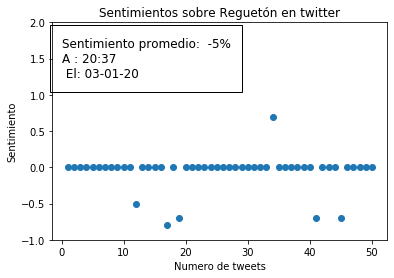

In [20]:
GraficarDatos(numeros_list,popularidad_list,numero)